#### Import all the required libraries.

In [1]:
import investpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Import dataset by using investpy  module.

In [2]:
df = investpy.get_stock_historical_data(stock = 'TCS',
                                        country = 'India',
                                        from_date = '01/01/2010',
                                        to_date = '31/12/2020', order = 'ascending')
df

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2010-01-04,364.34,366.32,361.57,362.82,1963682,INR
2010-01-05,364.44,366.64,360.36,362.92,2014488,INR
2010-01-06,362.92,363.09,353.82,354.71,3349176,INR
2010-01-07,355.03,356.91,343.20,344.84,6474892,INR
2010-01-08,345.61,346.82,336.20,337.79,6048178,INR
...,...,...,...,...,...,...
2020-12-24,2909.00,2921.35,2883.20,2909.35,1807144,INR
2020-12-28,2910.00,2949.70,2902.00,2929.40,2108994,INR
2020-12-29,2920.00,2952.00,2920.00,2930.50,1994151,INR


#### Convert it into DataFrame.

In [3]:
df = pd.DataFrame(df)
df

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2010-01-04,364.34,366.32,361.57,362.82,1963682,INR
2010-01-05,364.44,366.64,360.36,362.92,2014488,INR
2010-01-06,362.92,363.09,353.82,354.71,3349176,INR
2010-01-07,355.03,356.91,343.20,344.84,6474892,INR
2010-01-08,345.61,346.82,336.20,337.79,6048178,INR
...,...,...,...,...,...,...
2020-12-24,2909.00,2921.35,2883.20,2909.35,1807144,INR
2020-12-28,2910.00,2949.70,2902.00,2929.40,2108994,INR
2020-12-29,2920.00,2952.00,2920.00,2930.50,1994151,INR


***We don't need  open, High, Low, Volume, Currency columns, So you can drop it.***

In [4]:
df1 = df.drop(['Open','High','Low','Volume','Currency'], axis = 1)
df1

,Close
Date,
2010-01-04,362.82
2010-01-05,362.92
2010-01-06,354.71
2010-01-07,344.84
2010-01-08,337.79
...,...
2020-12-24,2909.35
2020-12-28,2929.40
2020-12-29,2930.50


#### Check and sort the values of dataset. In mhich, we need only  values of 'Close' column. and also you can filter the column with respect to the 'datetime'.

In [5]:
df2 = df1.sort_values(by=['Date'])
df2

,Close
Date,
2010-01-04,362.82
2010-01-05,362.92
2010-01-06,354.71
2010-01-07,344.84
2010-01-08,337.79
...,...
2020-12-24,2909.35
2020-12-28,2929.40
2020-12-29,2930.50


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2729 entries, 2010-01-04 to 2020-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2729 non-null   float64
dtypes: float64(1)
memory usage: 42.6 KB


In [7]:
df2.describe()

,Close
count,2729.000000
mean,1202.190407
std,601.485052
min,337.670000
25%,617.620000
50%,1185.510000
75%,1522.570000
max,2930.500000


In [8]:
df2.max()

Close    2930.5
dtype: float64

In [9]:
df2.min()

Close    337.67
dtype: float64

#### Visualization of Historical stock values of TCS.

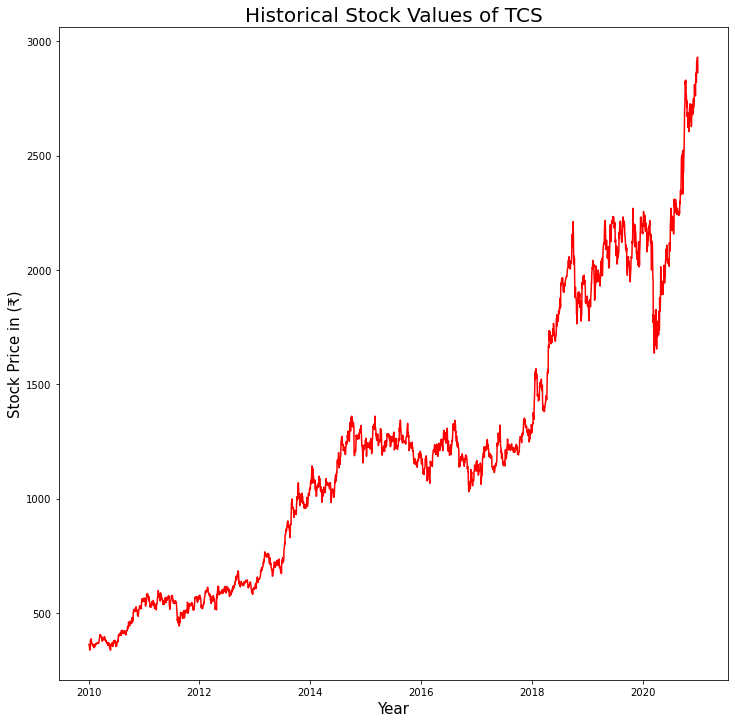

In [10]:

plt.figure(figsize=(12,12))
plt.plot(df2.index, df2['Close'], color = 'red')
plt.title('Historical Stock Values of TCS', size = 20)
plt.xlabel('Year', size = 15)
plt.ylabel('Stock Price in (₹)', size = 15)
plt.show()

#### Here, we required keras and tensorflow module. Install it in your enviroment and also import it.

In [11]:
# pip install keras

In [12]:
# pip install tensorflow

In [13]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math

#### Create a new data frame with only 'Close column'.

In [14]:
data = df2.filter(['Close'])

dataset = data.values #convert the data frame to a numpy array

training_data_len = math.ceil(len(dataset)*.9090)  # number of rows to train the model on

training_data_len

2481

#### Normalization
Whenever you use a neural network, you should normalize or scale your data. We will use MinMaxScaler class from the sklear.preprocessing library to scale our data between 0 and 1. The feature_range parameter is used to specify the range of the scaled data.

#### scale the data.

In [15]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00969983],
       [0.00973839],
       [0.00657197],
       ...,
       [1.        ],
       [0.99182361],
       [0.97387025]])

#### Create the training dataset.

In [16]:
train_data = scaled_data[0:training_data_len, :]

##### Split the data into x_train, y_train datasets.

we want our feature set to contain the close stock prices for the previous 60 days (Days can be varied, In this condition, I got timestep = 60. But we can change it). We need the stock prices for the previous 60 days.

In [17]:
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([9.69982606e-03, 9.73839396e-03, 6.57196962e-03, 2.76531820e-03,
       4.62814762e-05, 2.73060710e-03, 9.40285325e-03, 1.65687685e-02,
       1.49489168e-02, 1.71010055e-02, 1.91103929e-02, 1.51070452e-02,
       1.48679242e-02, 1.32365022e-02, 1.08530062e-02, 1.05483198e-02,
       8.14553982e-03, 7.85628059e-03, 6.82266095e-03, 8.67777679e-03,
       7.23533745e-03, 9.94280381e-03, 7.28933251e-03, 4.45844888e-03,
       5.61548578e-03, 4.58186615e-03, 6.62982147e-03, 6.09758449e-03,
       8.03369291e-03, 8.67777679e-03, 1.09108580e-02, 1.10034210e-02,
       1.10304185e-02, 9.49541621e-03, 1.07450161e-02, 1.16475048e-02,
       1.22530208e-02, 1.24188628e-02, 1.15896530e-02, 1.18519147e-02,
       1.28855343e-02, 1.19830456e-02, 1.17400678e-02, 1.17593518e-02,
       1.28739640e-02, 1.49874847e-02, 1.71395734e-02, 1.81346251e-02,
       2.20531234e-02, 2.41010787e-02, 2.62801649e-02, 2.35148467e-02,
       2.25930740e-02, 2.38388170e-02, 2.40355133e-02, 2.42514935e-02,
     

#### Convert the x_train and y_train  to numppy array.

In [18]:
x_train,y_train = np.array(x_train), np.array(y_train)

#### Reshape the data.

In [19]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(2421, 60, 1)

In [20]:
model =Sequential()
model.add(LSTM(64,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences= False))
model.add(Dense(32))
model.add(Dense(1))

#### Complie the model.

In [21]:
model.compile(optimizer='adam', loss='mean_squared_error')

#### Train the model.

In [22]:
model.fit(x_train,y_train, batch_size=1, epochs=10)

Epoch 1/10
2421/2421 [==============================] - 103s 40ms/step - loss: 0.0035
Epoch 2/10
2421/2421 [==============================] - 95s 39ms/step - loss: 4.3696e-04
Epoch 3/10
2421/2421 [==============================] - 102s 42ms/step - loss: 2.1729e-04
Epoch 4/10
2421/2421 [==============================] - 103s 43ms/step - loss: 2.2721e-04
Epoch 5/10
2421/2421 [==============================] - 105s 43ms/step - loss: 1.9431e-04
Epoch 6/10
2421/2421 [==============================] - 105s 43ms/step - loss: 1.5346e-04
Epoch 7/10
2421/2421 [==============================] - 112s 46ms/step - loss: 1.6114e-04
Epoch 8/10
2421/2421 [==============================] - 105s 43ms/step - loss: 1.7101e-04
Epoch 9/10
2421/2421 [==============================] - 108s 45ms/step - loss: 1.4485e-04
Epoch 10/10
2421/2421 [==============================] - 104s 43ms/step - loss: 1.3130e-04


#### Create the testing data sets. 
#### Create a new array containing scale values.

In [23]:
test_data= scaled_data[training_data_len-60:, :]

#### Create the data sets x_test and y_test.

In [24]:
x_test = []
y_test = dataset[training_data_len:,:]

for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

#### Convert the data to a numpy array.

In [25]:
x_test = np.array(x_test)

#### Reshape the data.

In [26]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

x_test.shape

(248, 60, 1)

#### Predicting the data.

In [27]:
predictions = model.predict(x_test)

predictions = scaler.inverse_transform(predictions)

#### Get the root mean square error(RMSE).

In [28]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)

rmse

8.917483815839224

#### Plot the data.

<ipython-input-29-a15855cda8bc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


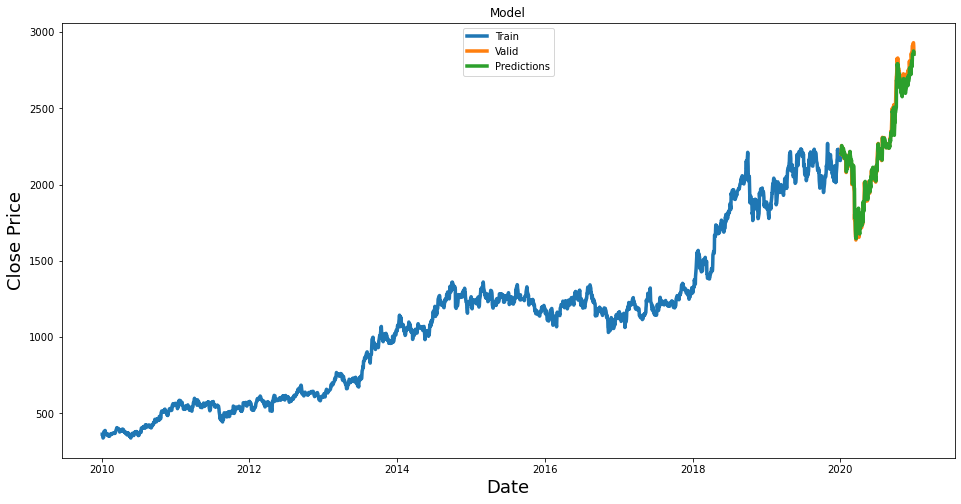

In [29]:
train = data[:training_data_len]

valid = data[training_data_len:]

valid['Predictions'] = predictions

#Visialization the data
plt.figure(figsize=(16,8))

plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price' ,fontsize=18)

plt.plot(train['Close'],linewidth=3.5)
plt.plot(valid[['Close','Predictions']],linewidth=3.5)

plt.legend(['Train','Valid','Predictions'], loc='upper center');
plt.show();

#### Show the valid and predicted price.

In [30]:
valid

,Close,Predictions
Date,,
2020-01-06,2200.45,2201.048096
2020-01-07,2205.85,2197.739502
2020-01-08,2255.25,2206.260010
2020-01-09,2214.35,2255.825684
2020-01-10,2213.55,2212.225098
...,...,...
2020-12-24,2909.35,2855.777832
2020-12-28,2929.40,2854.612305
2020-12-29,2930.50,2875.878906


#### Plot of the predicted stock price with actual stock price (Close).

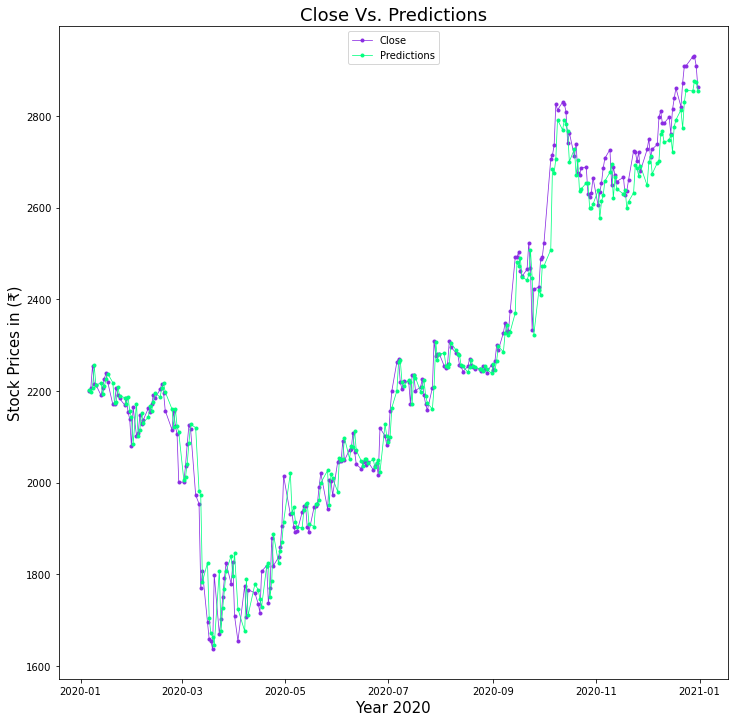

In [31]:
fig, ax = plt.subplots(figsize = (12,12))

ax.plot(valid['Close'], color = 'blueviolet', marker='.', linewidth='0.75')

ax.plot(valid['Predictions'], color = 'springgreen', marker='.', linewidth='0.75')

plt.title( 'Close Vs. Predictions', size = 18)
plt.xlabel('Year 2020', size =15)
plt.ylabel('Stock Prices in (₹)', size = 15)

plt.legend(['Close', 'Predictions'], loc = 'upper center')

plt.show()